# <a name="C"> SOMMAIRE <a/>

 
 **<a href="#C4"> Classification supervisée : </a>**
    
Deux (2) approches sont présentées :

+ Une approche simple par préparation initiale de l'ensemble des images avant classification supervisée
+ Approche nouvelle par Dataset avec data augmentation intégrée au modèle
 
    
### <a href ="#C41"> 4.1) Approche préparation initiale des images </a>
  + <a href ="#C411"> 4.1.1) Préparation des données </a>
  + <a href ="#C412"> 4.1.2) Création du modèle </a>
  + <a href ="#C413"> 4.1.3) Entrainement des données </a>
  + <a href ="#C414"> 4.1.4) Evaluation du modèle </a>
  
  
### <a href ="#C42"> 4.2) Approche avec data augmentation intégrée au modèle </a>
    
  + <a href ="#C421"> 4.2.1) Création des sous répertoire </a>
  + <a href ="#C422"> 4.2.2) Préparation des données </a>
  + <a href ="#C423"> 4.1.3) Création du modèle de classification </a>
  + <a href ="#C424"> 4.1.4) Entrainement des données </a>
  + <a href ="#C425"> 4.1.5) Evaluation du modèle </a>

## <a name="C41"> 4.1) Approche préparation initiale des images <a/>
    
Elle implique la collecte, le nettoyage, le prétraitement et l'extraction de caractéristiques des images avant de les utiliser pour entraîner un modèle de classification. Cette approche vise à préparer les données de manière optimale afin d'obtenir de bonnes performances de classification

## Importation des librairies

In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import cv2
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model, Sequential

## Importation dataset

In [2]:
from PIL import Image
from os import listdir

# Chemin vers le dossier contenant les images
repertoire_destination = "./Flipkart/images_renommees/"

# Compter le nombre fichier image dans le dossier
list_photos_nouv = [file for file in listdir(repertoire_destination)]
print(len(list_photos_nouv))

1050


In [3]:
data = pd.read_csv('data')
data.head()

,image,nouveau_nom,category,label
0,009099b1f6e1e8f893ec29a7023153c4.jpg,image_0.jpg,Watches,6
1,0096e89cc25a8b96fb9808716406fe94.jpg,image_1.jpg,Kitchen & Dining,5
2,00cbbc837d340fa163d11e169fbdb952.jpg,image_2.jpg,Home Furnishing,4
3,00d84a518e0550612fcfcba3b02b6255.jpg,image_3.jpg,Beauty and Personal Care,1
4,00e966a5049a262cfc72e6bbf68b80e7.jpg,image_4.jpg,Computers,2


In [4]:
data_cnn = pd.read_csv('data_label')
data_cnn.head()

,image,nouveau_nom,category,label,Label_sift,Label_cnn
0,009099b1f6e1e8f893ec29a7023153c4.jpg,image_0.jpg,Watches,6,0,4
1,0096e89cc25a8b96fb9808716406fe94.jpg,image_1.jpg,Kitchen & Dining,5,6,1
2,00cbbc837d340fa163d11e169fbdb952.jpg,image_2.jpg,Home Furnishing,4,5,5
3,00d84a518e0550612fcfcba3b02b6255.jpg,image_3.jpg,Beauty and Personal Care,1,1,6
4,00e966a5049a262cfc72e6bbf68b80e7.jpg,image_4.jpg,Computers,2,1,1


In [5]:
list_labels = ['Home Furnishing ', 'Baby Care ', 'Watches ','Home Decor & Festive Needs ', 'Kitchen & Dining ',
               'Beauty and Personal Care ', 'Computers ']

### <a name="C411"> 4.1.1) Préparation des données <a/>

La fonction **image_prep_fct** prépare les images en effectuant les étapes de prétraitement nécessaires pour les utiliser comme entrée dans un modèle de réseau de neurones convolutif

In [6]:
def image_prep_fct(data) :
    prepared_images = []

    # Boucle pour extraire les caractéristiques de chaque image
    for image_file in data["nouveau_nom"]:
        img_path = "./Flipkart/images_renommees/"
        image = load_img(img_path + image_file, target_size=(224, 224)) # Charge l'image et redimensionne l'image 
        img = img_to_array(image) # Convertir l'image en un tableau numpy.
       
        img = img.reshape((img.shape[0], img.shape[1], img.shape[2])) # Réorganise les dimensions du tableau pour correspondre à la forme (hauteur, largeur, canaux) de l'image.
        img = preprocess_input(img)
        prepared_images.append(img)
        prepared_images_np = np.array(prepared_images) #  Convertir la liste en un tableau numpy.
    return prepared_images_np
    
images_np = image_prep_fct(data)

X = images_np
print(images_np.shape)

C:\Users\dmedc\anaconda3\lib\site-packages\PIL\Image.py:2896: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


(1050, 224, 224, 3)


La dimension (1050, 224, 224, 3) indique qu'il y a un tableau de 1050 éléments, chacun étant une grille de 224x224 pixels avec 3 canaux de couleur (Rouge, Vert et Bleu)

In [7]:
from tensorflow.keras.utils import to_categorical
# effectue la conversion des étiquettes de classe en format catégoriel
y = to_categorical(data['label'])
y

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [8]:
from sklearn.model_selection import train_test_split

#  Diviser les données en ensembles d'entraînement et de test 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.20, random_state=42)

X_train.shape

(840, 224, 224, 3)

**train_test_split** : fonction est utilisée pour diviser les données en ensembles de formation et de test.

+ **stratify = y**: ce paramètre est utilisé pour garantir que le processus de fractionnement maintient la même distribution de la variable cible ( y) dans les ensembles d'entraînement et de test

+ **test_size = 0.25**: Ce paramètre définit toujours la proportion de l'ensemble de données à utiliser pour les tests à 25 %, laissant 75 % pour la formation.

+ **random_state = 42**: Ce paramètre définit la graine aléatoire pour la reproductibilité, garantissant que si vous exécutez le code plusieurs fois avec la même graine, vous obtiendrez la même répartition.

### <a name="C412"> 4.1.2) Création du modèle <a/>

La fonction **create_model_fct** crée et renvoie un modèle de réseau de neurones convolutif avec une architecture basée sur le modèle pré-entraîné VGG16

In [9]:
def create_model_fct() :
    # Récupération modèle pré-entraîné
    model0 = VGG16(include_top=False, weights="imagenet", input_shape=(224, 224, 3))

    # Layer non entraînables = on garde les poids du modèle pré-entraîné
    for layer in model0.layers:
        layer.trainable = False

   
    x = model0.output  # Récupérer la sortie de ce réseau
    x = GlobalAveragePooling2D()(x) # réduit les dimensions spatiales de la sortie 
    x = Dense(256, activation='relu')(x) # Ajoute une couche dense entièrement connectée avec 256 neurones.
    x = Dropout(0.5)(x) # prévenir le surapprentissage en introduisant du bruit et en améliorant la généralisation du modèle.
    predictions = Dense(7, activation='softmax')(x)

    # Définir le nouveau modèle
    model = Model(inputs=model0.input, outputs=predictions)
    # compilation du modèle 
    model.compile(loss="categorical_crossentropy", optimizer='rmsprop', metrics=["accuracy"])

    print(model.summary())
    
    return model

#### Création du modèle

In [10]:
from tensorflow.keras.layers import GlobalAveragePooling2D, GlobalAveragePooling1D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from glob import glob

# Création du modèle
with tf.device('/gpu:0'): # Accélérer le calcul si un GPU est disponible
    model1 = create_model_fct()

# Création du callback

# Définir le chemin d'enregistrement pour les poids du modèle
model1_save_path1 = "./model1_best_weights.h5"
# Définir un callback de sauvegarde des poids du modèle pendant l'entraînement
checkpoint = ModelCheckpoint(model1_save_path1, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
# Définir un callback d'arrêt précoce pendant l'entraînement
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
# Créer une liste de callbacks en regroupant les callbacks de sauvegarde et d'arrêt précoce
callbacks_list = [checkpoint, es] 

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

### <a name="C413"> 4.1.3) Entrainement des données <a/>

In [11]:
# Entraîner sur les données d'entraînement (X_train, y_train)

with tf.device('/gpu:0'): 
    history1 = model1.fit(X_train, y_train, epochs=50, batch_size=64, 
                       callbacks=callbacks_list, validation_data=(X_val, y_val), verbose=1)

Epoch 1/50
14/14 [==============================] - ETA: 0s - loss: 5.0691 - accuracy: 0.4560 
Epoch 1: val_loss improved from inf to 1.42866, saving model to .\model1_best_weights.h5
14/14 [==============================] - 192s 14s/step - loss: 5.0691 - accuracy: 0.4560 - val_loss: 1.4287 - val_accuracy: 0.7476
Epoch 2/50
14/14 [==============================] - ETA: 0s - loss: 1.9277 - accuracy: 0.6774 
Epoch 2: val_loss improved from 1.42866 to 0.98851, saving model to .\model1_best_weights.h5
14/14 [==============================] - 190s 14s/step - loss: 1.9277 - accuracy: 0.6774 - val_loss: 0.9885 - val_accuracy: 0.7667
Epoch 3/50
14/14 [==============================] - ETA: 0s - loss: 1.1239 - accuracy: 0.7417 
Epoch 3: val_loss improved from 0.98851 to 0.91247, saving model to .\model1_best_weights.h5
14/14 [==============================] - 184s 13s/step - loss: 1.1239 - accuracy: 0.7417 - val_loss: 0.9125 - val_accuracy: 0.8048
Epoch 4/50
14/14 [=============================

**with tf.device('/gpu:0'):**: Ce gestionnaire de contexte spécifie que les opérations qu'il contient doivent être exécutées sur le GPU avec l'index 0. Si vous disposez de plusieurs GPU, vous pouvez spécifier un index différent ou l'utiliser /gpupour sélectionner automatiquement un GPU disponible.

**history1 = model1.fit(...):** Cette ligne entraîne votre modèle ( model1) à l'aide des données d'entraînement ( X_trainet y_train). La formation est effectuée pendant 50 époques avec une taille de lot de 64. La fitméthode renvoie un objet historique ( history1) qui contient des informations sur le processus de formation, telles que la perte et la précision de la formation et de la validation.

+ callbacks = callbacks_list: Ce paramètre permet d'utiliser des rappels pendant l'entraînement. Les rappels sont des fonctions exécutées à des moments spécifiques pendant la formation. Dans ce cas, vous semblez avoir une liste de rappels ( callbacks_list) qui seront appliqués lors de la formation. Les rappels peuvent être utilisés à diverses fins, telles que l'enregistrement du modèle, l'arrêt anticipé ou la journalisation.

+ validation_data = (X_val, y_val): Ce paramètre précise les données de validation à utiliser lors de la formation. Les performances du modèle sur ces données seront surveillées et vous pourrez l'utiliser pour observer dans quelle mesure le modèle se généralise aux données qu'il n'a pas vues pendant l'entraînement.

+ verbose=1: Ce paramètre définit la verbosité pendant l'entraînement. Le définir sur 1 signifie que vous verrez des barres de progression pour chaque époque.

#### Score du dernier epoch

In [12]:
# Evaluer le modele sur le training set
loss, accuracy = model1.evaluate(X_train, y_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
print()

# Evaluer le modele sur le testing set
loss, accuracy = model1.evaluate(X_val, y_val, verbose=True)
print("Validation Accuracy:  {:.4f}".format(accuracy))

27/27 [==============================] - 143s 5s/step - loss: 0.0293 - accuracy: 0.9917
Training Accuracy: 0.9917

7/7 [==============================] - 36s 5s/step - loss: 0.9704 - accuracy: 0.8143
Validation Accuracy:  0.8143


####  Score de l'epoch optimal

In [13]:
# Charger le modèle pré-entraîné pour faire des évaluer ses performances.
model1.load_weights(model1_save_path1)

loss, accuracy = model1.evaluate(X_val, y_val, verbose=False)
print("Validation Accuracy :  {:.4f}".format(accuracy))

loss, accuracy = model1.evaluate(X_test, y_test, verbose=False)
print("Test Accuracy       :  {:.4f}".format(accuracy))

Validation Accuracy :  0.8095
Test Accuracy       :  0.8631


####   Visualisation de l'historique de formation du modèle 

In [14]:
pip install plot_keras_history

Note: you may need to restart the kernel to use updated packages.


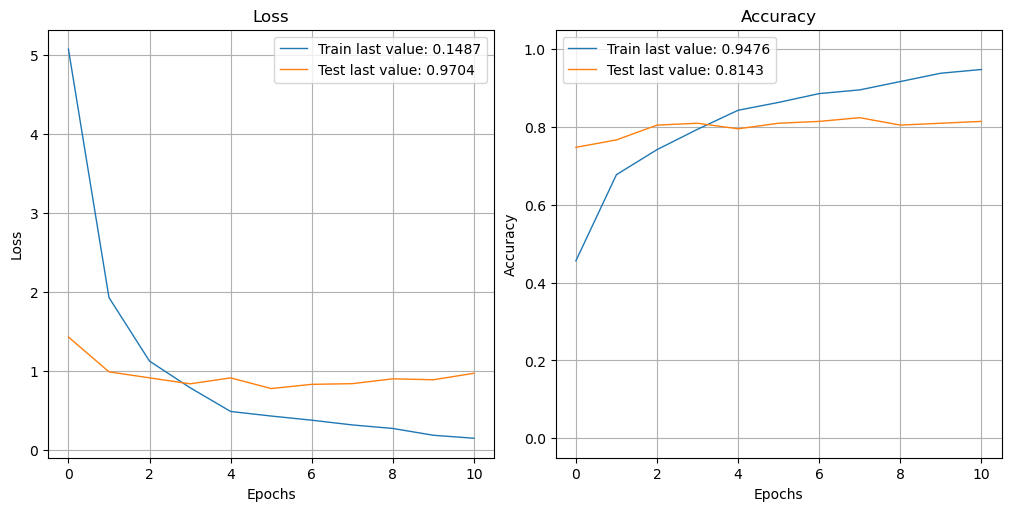

In [15]:
from plot_keras_history import show_history, plot_history
import matplotlib.pyplot as plt

# Affiche le tracé interactif de l'historique de l'entraînement 
show_history(history1)
plot_history(history1, path="standard.png")
plt.close() #  ferme le tracé interactif

### <a name="C414"> 4.1.4) Evaluation du modèle <a/>

Evaluer les performances de notre modèle en comparant les étiquettes réelles  avec les étiquettes prédites

### a.) Conversion des Labels en Labels numérique

la fonction **np.argmax** convertiT des vecteurs de variables catégorielles (one-hot encoded) en variables numériques en récupérant l'indice de la valeur maximale dans chaque vecteur.

y_train, y_val et y_test sont des vecteurs de variables catégorielles

In [16]:
# Convertir en variables numériques
y_train_num = np.argmax(y_train, axis=1)
y_val_num = np.argmax(y_val, axis=1)
y_test_num = np.argmax(y_test, axis=1)

In [17]:
# Prédire les étiquettes
y_train_pred = np.argmax(model1.predict(X_train), axis=1)
y_val_pred = np.argmax(model1.predict(X_val), axis=1)
y_test_pred = np.argmax(model1.predict(X_test), axis=1)

9/9 [==============================] - 48s 5s/step


### b.) Analyse de similarité (ARI)

In [18]:
from sklearn import cluster, metrics

print("Le Score ARI pour data_train est de : ", metrics.adjusted_rand_score(y_train_num, y_train_pred))
print(60*"-")
print("Le Score ARI pour data_test est de : ", metrics.adjusted_rand_score(y_test_num, y_test_pred))

Le Score ARI pour data_train est de :  0.9319162698492308
------------------------------------------------------------
Le Score ARI pour data_train est de :  0.7078951476659227


### c.) Analyse de précision (Accuracy)

#### Matrice de confusion

La matrice de confusion permet d'analyser les erreurs de classification commises par le modèle. En examinant les valeurs hors de la diagonale (les valeurs d'erreur), vous pouvez identifier quelles classes sont souvent confondues entre elles. Cela peut vous donner des indications sur les améliorations potentielles à apporter au modèle ou aux données pour améliorer les performances de classification.

In [19]:
# Matrice de confusion
from sklearn import cluster, metrics

conf_mat_val = metrics.confusion_matrix(y_val_num, y_val_pred)
print("Donnée validation")
print(conf_mat_val)

print("---------------------------------------------------------------------------------------")

conf_mat_test = metrics.confusion_matrix(y_test_num, y_test_pred)
print("Donnée test")
print(conf_mat_test)

Donnée validation
[[22  1  0  2  2  2  1]
 [ 0 27  1  1  0  1  0]
 [ 1  0 27  1  0  1  0]
 [ 4  1  1 20  1  2  1]
 [ 7  0  1  1 21  0  0]
 [ 1  1  0  2  0 26  0]
 [ 0  2  0  0  0  1 27]]
---------------------------------------------------------------------------------------
Donnée test
[[30  1  0  2  2  2  1]
 [ 0 33  1  1  0  1  1]
 [ 1  0 35  1  0  1  0]
 [ 3  2  1 28  1  2  1]
 [ 6  0  0  0 32  0  0]
 [ 1  1  0  1  0 34  0]
 [ 0  1  0  0  0  1 35]]


La fonction **conf_mat_transform()** utilise une matrice de confusion pour attribuer une correspondance entre les valeurs prédites et les classes réelles, puis elle transforme les valeurs prédites en utilisant cette correspondance

In [20]:
def conf_mat_transform(y_true,y_pred) :
    conf_mat = metrics.confusion_matrix(y_true, y_pred)
    
    # Trouver l'indice maximum dans chaque colonne de la matrice de confusion
    corresp = np.argmax(conf_mat, axis=0)
    print ("Correspondance des clusters : ", corresp)
    #  créer un objet Series à partir des valeurs réelles y_true et le trasforme en dataframe
    labels = pd.Series(y_true, name="y_true").to_frame()
    # ajouter une colonne "y_pred" au DataFrame labels et y assigner les valeurs prédites y_pred
    labels['y_pred'] = y_pred
    # remplacer la valeur prédite par sa correspondance trouvée dans le tableau corresp
    labels['y_pred_transform'] = labels['y_pred'].apply(lambda x : corresp[x]) 
    
    return labels['y_pred_transform']

#### c1.) Evaluation Data Validation

In [21]:
y_val_pred_transform = conf_mat_transform(y_val_num, y_val_pred)
conf_mat = metrics.confusion_matrix(y_val_num, y_val_pred_transform)
print(conf_mat)
print()
print(metrics.classification_report(y_val_num, y_val_pred_transform))

Correspondance des clusters :  [0 1 2 3 4 5 6]
[[22  1  0  2  2  2  1]
 [ 0 27  1  1  0  1  0]
 [ 1  0 27  1  0  1  0]
 [ 4  1  1 20  1  2  1]
 [ 7  0  1  1 21  0  0]
 [ 1  1  0  2  0 26  0]
 [ 0  2  0  0  0  1 27]]

              precision    recall  f1-score   support

           0       0.63      0.73      0.68        30
           1       0.84      0.90      0.87        30
           2       0.90      0.90      0.90        30
           3       0.74      0.67      0.70        30
           4       0.88      0.70      0.78        30
           5       0.79      0.87      0.83        30
           6       0.93      0.90      0.92        30

    accuracy                           0.81       210
   macro avg       0.82      0.81      0.81       210
weighted avg       0.82      0.81      0.81       210



<AxesSubplot:>

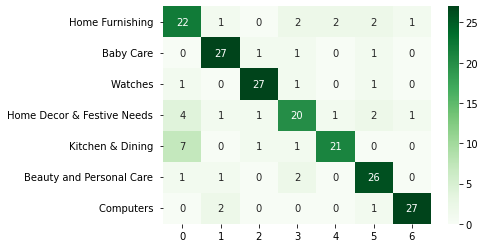

In [22]:
df_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels],
                  columns = [i for i in "0123456"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Greens")

#### c2.) Evaluation Data Test

In [23]:
y_test_pred_transform = conf_mat_transform(y_test_num, y_test_pred)
conf_mat = metrics.confusion_matrix(y_test_num, y_test_pred_transform)
print(conf_mat)
print("-----------------------------------------------------------------------")
print(metrics.classification_report(y_test_num, y_test_pred_transform))

Correspondance des clusters :  [0 1 2 3 4 5 6]
[[30  1  0  2  2  2  1]
 [ 0 33  1  1  0  1  1]
 [ 1  0 35  1  0  1  0]
 [ 3  2  1 28  1  2  1]
 [ 6  0  0  0 32  0  0]
 [ 1  1  0  1  0 34  0]
 [ 0  1  0  0  0  1 35]]
-----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.73      0.79      0.76        38
           1       0.87      0.89      0.88        37
           2       0.95      0.92      0.93        38
           3       0.85      0.74      0.79        38
           4       0.91      0.84      0.88        38
           5       0.83      0.92      0.87        37
           6       0.92      0.95      0.93        37

    accuracy                           0.86       263
   macro avg       0.87      0.86      0.86       263
weighted avg       0.87      0.86      0.86       263



<AxesSubplot:>

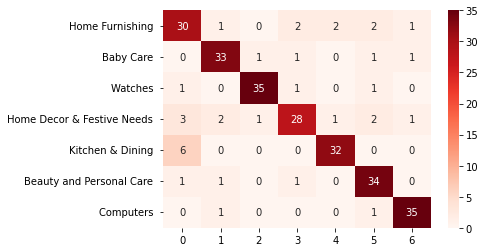

In [24]:
df_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels],
                  columns = [i for i in "0123456"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Reds")

## <a name="C42"> 4.2) Approche avec data augmentation intégrée au modèle <a/>

Elle combine le chargement des données et les techniques d'augmentation de données directement dans le modèle d'apprentissage automatique. Cela simplifie le processus de prétraitement des données, augmente la diversité des exemples d'entraînement et améliore les performances du modèle.
    
######  <a href="#C"> Retour Sommaire <a/>

# Importation des librairies

In [25]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import cv2
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model, Sequential

# Importation de dataset

In [26]:
from PIL import Image
from os import listdir

# Chemin vers le dossier contenant les images
repertoire_destination = "./Flipkart/images_renommees/"

# Compter le nombre fichier image dans le dossier
list_photos_nouv = [file for file in listdir(repertoire_destination)]
print(len(list_photos_nouv))

1050


In [27]:
data = pd.read_csv('data')
data.head()

,image,nouveau_nom,category,label
0,009099b1f6e1e8f893ec29a7023153c4.jpg,image_0.jpg,Watches,6
1,0096e89cc25a8b96fb9808716406fe94.jpg,image_1.jpg,Kitchen & Dining,5
2,00cbbc837d340fa163d11e169fbdb952.jpg,image_2.jpg,Home Furnishing,4
3,00d84a518e0550612fcfcba3b02b6255.jpg,image_3.jpg,Beauty and Personal Care,1
4,00e966a5049a262cfc72e6bbf68b80e7.jpg,image_4.jpg,Computers,2


In [28]:
list_labels = ['Home Furnishing ', 'Baby Care ', 'Watches ','Home Decor & Festive Needs ', 'Kitchen & Dining ',
               'Beauty and Personal Care ', 'Computers ']

### <a name="C421"> 4.2.1) Création des sous répertoire <a/>

La fonction vérifie l'existence du répertoire, ainsi que celle des sous-dossiers **"dataset_train et dataset_test**. Elle  supprime egalement tous les fichiers contenus dans deux sous-dossiers; Elle invite ainsi, l'ajout supplémentaire de fichier au delà de la prportion indiquée

In [29]:
def delete_files_in_subdirectories(parent_directory, subdirectory1, subdirectory2):
    
    # Vérifier si le répertoire parent existe
    if os.path.exists(parent_directory):
        # Chemin complet des sous-dossiers
        path_subdirectory1 = os.path.join(parent_directory, subdirectory1)
        path_subdirectory2 = os.path.join(parent_directory, subdirectory2)
        
        # Vérifier si les sous-dossiers existent
        if os.path.exists(path_subdirectory1) and os.path.exists(path_subdirectory2):
            # Vérifier si le premier sous-dossier contient des fichiers
            file_list1 = os.listdir(path_subdirectory1)
            if len(file_list1) > 0:
                # Supprimer les fichiers du premier sous-dossier
                for file_name1 in file_list1:
                    file_path1 = os.path.join(path_subdirectory1, file_name1)
                    if os.path.isfile(file_path1):
                        os.remove(file_path1)
                print("fichiers initiaux supprimés dans le dataset_train.")
            else:
                print("Pas de fichiers dans le dataset_train.")
            
            # Vérifier si le deuxième sous-dossier contient des fichiers
            file_list2 = os.listdir(path_subdirectory2)
            if len(file_list2) > 0:
                # Supprimer les fichiers du deuxième sous-dossier
                for file_name2 in file_list2:
                    file_path2 = os.path.join(path_subdirectory2, file_name2)
                    if os.path.isfile(file_path2):
                        os.remove(file_path2)
                print("fichiers initiaux supprimés dans le dataset_test.")
            else:
                print("Pas de fichiers dans le dataset_test.")
        else:
            print("Les sous-dossiers spécifiés n'existent pas.")
    else:
        print("Le répertoire parent spécifié n'existe pas.")

parent_directory_path = "./Flipkart/images_renommees_split/"
subdirectory1_name = "dataset_train"
subdirectory2_name = "dataset_test"

La fonction qui alimente les sous-dossiers : **dataset_train et dataset_test** de fichier, à partir du répertoire source.

In [30]:
import os
import random
import shutil

def create_datasets(source_dir, train_ratio, test_ratio, output_dir):
    # Création des dossiers de sortie
    os.makedirs(output_dir, exist_ok=True)
    train_dir = os.path.join(output_dir, 'dataset_train')
    test_dir = os.path.join(output_dir, 'dataset_test')
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)

    # Obtention de la liste de tous les fichiers dans le répertoire source
    file_list = os.listdir(source_dir)
    num_files = len(file_list)

    # Calcul du nombre d'échantillons pour chaque ensemble
    num_train = int(train_ratio * num_files)
    num_test = int(test_ratio * num_files)

    # Mélange aléatoire de la liste des fichiers
    random.shuffle(file_list)

    # Copie des fichiers dans les dossiers d'ensemble correspondants
    for i, file_name in enumerate(file_list):
        source_file = os.path.join(source_dir, file_name)
        if i < num_train:
            destination_file = os.path.join(train_dir, file_name)
        else:
            destination_file = os.path.join(test_dir, file_name)
        shutil.copyfile(source_file, destination_file)

    print("Ensembles de données créés avec succès !")

# Exemple d'utilisation de la fonction
source_directory = "./Flipkart/images_renommees/"
output_directory = "./Flipkart/images_renommees_split/"
train_ratio = 0.75  # Ratio des données d'entraînement
test_ratio = 0.25  # Ratio des données de test

In [31]:
# Fonction pour reset les sous-dossier
delete_files_in_subdirectories(parent_directory_path, subdirectory1_name, subdirectory2_name)
# Fonction pour alimenter les sous-dossier
create_datasets(source_directory, train_ratio, test_ratio, output_directory)

Le répertoire parent spécifié n'existe pas.
Ensembles de données créés avec succès !


### a.) Les données d'entrainement
Nous allons renommer les image en utilisant les noms initiaux et la catégorie des images

In [32]:
from PIL import Image
from os import listdir

# Chemin vers le dossier contenant les images
dossier_images = "./Flipkart/images_renommees_split/dataset_train/"

# Mettre la liste sous forme de dataframe
list_photos = [file for file in listdir(dossier_images)]
df_train = pd.DataFrame({"nouveau_nom": list_photos})
df_train.head()

,nouveau_nom
0,image_0.jpg
1,image_1.jpg
2,image_100.jpg
3,image_1000.jpg
4,image_1001.jpg


##### Fusionner les deux(2) dataframes : "data" et "df_train"

In [33]:
# Fusionner les dataframe
data_train = pd.merge(df_train, data, on= 'nouveau_nom' )
data_train.head()

,nouveau_nom,image,category,label
0,image_0.jpg,009099b1f6e1e8f893ec29a7023153c4.jpg,Watches,6
1,image_1.jpg,0096e89cc25a8b96fb9808716406fe94.jpg,Kitchen & Dining,5
2,image_100.jpg,19a570b6717955a8c48e5f280617ef24.jpg,Watches,6
3,image_1000.jpg,f3dec6a97225941bf9c3213e73943bd3.jpg,Home Furnishing,4
4,image_1001.jpg,f41761a931135c6c043c7e04abda41b0.jpg,Home Furnishing,4


##### Renommage des images

La fonction ajoute aux noms des images leurs catégories

In [34]:
import os
import pandas as pd

def renommer_images(repertoire_images, repertoire_destination):
    
    os.makedirs(repertoire_destination, exist_ok=True)

    # Parcourir chaque ligne du DataFrame des catégories
    for index, row in data_train.iterrows():
        nom_image = row['nouveau_nom']
        
        # Extraire la catégorie de la colonne correspondante dans le DataFrame
        category = row['category']

        # Construire le nouveau nom de l'image
        nouveau_nom = f"{category}_{nom_image}"

        # Chemin d'accès à l'image source
        chemin_source = os.path.join(repertoire_images, nom_image) # construire le chemin d'accès complet au fichier en joignant le répertoire source et le nom du fichier
        repertoire_destination_finale = repertoire_destination + category +"/" # ( /) : est utilisé pour séparer les répertoires dans un chemin d'accès
        repertoire_destination_finale = repertoire_destination_finale.replace(" ","_")
        os.makedirs( repertoire_destination_finale, exist_ok=True) # créer le répertoire spécifié avec une option permettant d'ignorer l'erreur si le répertoire existe déjà

        # Chemin d'accès à l'image de destination
        chemin_destination = os.path.join(repertoire_destination_finale, nouveau_nom)

        # Renommer et déplacer l'image
        shutil.copy(chemin_source, chemin_destination)
        
    print("Fichiers renommés !")

# Exemple d'utilisation
repertoire_images = "./Flipkart/images_renommees_split/dataset_train/"
repertoire_destination = "./Flipkart/path_train/"
renommer_images(repertoire_images, repertoire_destination)

Fichiers renommés !


### b.) Les données test

In [35]:
# Conversion de la liste d'image en dataframe
dossier_images = "./Flipkart/images_renommees_split/dataset_test/"
# Mettre la liste sous forme de dataframe
list_photos = [file for file in listdir(dossier_images)]
df_test = pd.DataFrame({"nouveau_nom": list_photos})

# Fusionner les deux(2) dataframes
data_test = pd.merge(df_test, data, on= 'nouveau_nom' )
data_test.head()

,nouveau_nom,image,category,label
0,image_10.jpg,025a85a3d1cddc6307f7dc075d8d2132.jpg,Kitchen & Dining,5
1,image_1002.jpg,f4d4c2eec77732f56e47722d7a355f2b.jpg,Home Decor & Festive Needs,3
2,image_1007.jpg,f69bef5db54cb4c83b2aa8d0ce829d4e.jpg,Kitchen & Dining,5
3,image_1008.jpg,f6fbce5fffb82a83d7529815c4be9a72.jpg,Beauty and Personal Care,1
4,image_1009.jpg,f74476ba64365d97a5be7d375cbf4c7a.jpg,Watches,6


In [36]:
import os
import pandas as pd

def renommer_images(repertoire_images, repertoire_destination):
    
    os.makedirs(repertoire_destination, exist_ok=True)
     
    # Parcourir chaque ligne du DataFrame des catégories
    for index, row in data_test.iterrows():
        nom_image = row['nouveau_nom']
        
        # Extraire la catégorie de la colonne correspondante dans le DataFrame
        category = row['category']

        # Construire le nouveau nom de l'image
        nouveau_nom = f"{category}_{nom_image}"

        # Chemin d'accès à l'image source
        chemin_source = os.path.join(repertoire_images, nom_image) # construire le chemin d'accès complet au fichier en joignant le répertoire source et le nom du fichier
        repertoire_destination_finale = repertoire_destination + category + "/" # ( /) : est utilisé pour séparer les répertoires dans un chemin d'accès
        repertoire_destination_finale = repertoire_destination_finale.replace(" ","_")
        os.makedirs( repertoire_destination_finale, exist_ok=True) # créer le répertoire spécifié avec une option permettant d'ignorer l'erreur si le répertoire existe déjà

        # Chemin d'accès à l'image de destination
        chemin_destination = os.path.join(repertoire_destination_finale, nouveau_nom)

        # Renommer et déplacer l'image
        shutil.copy(chemin_source, chemin_destination)
        
    print("Fichiers renommés !")

# Exemple d'utilisation
repertoire_images =  "./Flipkart/images_renommees_split/dataset_test/"
repertoire_destination = "./Flipkart/path_tests/"
renommer_images(repertoire_images, repertoire_destination)

Fichiers renommés !


### <a name="C422"> 4.2.2) Préparation des données <a/>

In [37]:
path_train = "./Flipkart/path_train/"
path_test = "./Flipkart/path_tests/"

La fonction **dataset_fct** est une fonction qui utilise la méthode image_dataset_from_directory de TensorFlow pour charger les données d'un répertoire spécifié.

In [38]:
batch_size = 32

def dataset_fct(path, validation_split=0, data_type=None) :
    dataset = tf.keras.utils.image_dataset_from_directory(
                    path, labels='inferred', label_mode='categorical',
                    class_names=None, batch_size=batch_size, image_size=(224, 224), shuffle=True, seed=42,
                    validation_split=validation_split, subset=data_type
                    )
    return dataset

Voici une explication ligne par ligne :

 **batch_size = 32** est utilisé pour spécifier la taille des mini-lots (ou batch) dans le jeu de données. Le mini-lot est un groupe d'échantillons qui est traité simultanément lors de l'entraînement du modèle.

1. La fonction **dataset_fct** prend en paramètre path, qui est le chemin du répertoire contenant les images à charger. Elle prend également en compte deux paramètres optionnels : validation_split qui spécifie la fraction de données à utiliser pour la validation, et data_type qui permet de spécifier si les données sont destinées à l'entraînement ou à la validation.

2. dataset est une variable dans laquelle nous allons stocker le jeu de données chargé à partir du répertoire spécifié.

3. **tf.keras.utils.image_dataset_from_directory** est une méthode de TensorFlow qui permet de créer un jeu de données à partir d'un répertoire contenant des images. Elle prend plusieurs paramètres pour personnaliser le chargement des données :
  + labels='inferred': déduit les étiquettes de classe à partir de la structure de répertoires.
  + label_mode='categorical': Représente les étiquettes sous forme de tableaux catégoriels codés à chaud.
  + image_size=(224, 224): redimensionne les images à une taille cible de 224 x 224 pixels.
  + shuffle=True : Mélange l'ensemble de données pour l'entraînement.
  + seed=42: Définit la graine pour la reproductibilité.
  + validation_split : La fraction des données à utiliser pour la validation. Si validation_split est défini sur 0, aucune donnée de validation ne sera générée.
  + subset : Spécifie si les données sont destinées à l'entraînement ou à la validation.

In [39]:
dataset_train = dataset_fct(path_train, validation_split=0.25, data_type='training')
dataset_val = dataset_fct(path_train, validation_split=0.33, data_type='validation')
dataset_test = dataset_fct(path_test, validation_split=0, data_type=None)

Found 787 files belonging to 7 classes.
Using 591 files for training.
Found 787 files belonging to 7 classes.
Using 259 files for validation.
Found 263 files belonging to 7 classes.


une fonction "**resize_and_rescale**" qui prend en entrée une image et une étiquette (label) et effectue deux transformations sur l'image

In [40]:
def resize_and_rescale(image, label):
    # convertir le type de données de l'image en vue d'effectuer des opération math
    image = tf.cast(image, tf.float32)
    
    # ajuster la taille de l'image en préservant son aspect ratio.
    image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE]) 
    image = (image / 255.0)
    return image, label

### <a name="C423"> 4.2.3) Création du modèle de classification <a/>

La fonction **create_model_fct2** crée et renvoie un modèle de réseau de neurones convolutif avec une architecture basée sur le modèle pré-entraîné VGG16

In [41]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

def create_model_fct2() :
    # Data augmentation
    data_augmentation = Sequential([RandomFlip("horizontal", input_shape=(224, 224, 3)),RandomRotation(0.1), RandomZoom(0.1),
        # Rescaling(1./127.5, offset=-1.0)
      ])
    
    # Récupération modèle pré-entraîné
    model_base = VGG16(include_top=False, weights="imagenet", input_shape=(224, 224, 3))
    for layer in model_base.layers:
        layer.trainable = False

    # Définition du nouveau modèle
    model = Sequential([data_augmentation, Rescaling(1./127.5, offset=-1), model_base, GlobalAveragePooling2D(),
                Dense(256, activation='relu'), Dropout(0.5), Dense(7, activation='softmax')
                ])

    # compilation du modèle 
    model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])

    print(model.summary())
    
    return model

#### Création du modèle

In [42]:
from tensorflow.keras.layers import Rescaling, RandomFlip, RandomRotation, RandomZoom

# Création du modèle
with tf.device('/gpu:0'): 
    model4 = create_model_fct2()

# Création du callback
model4_save_path = "./model4_best_weights.h5"
checkpoint = ModelCheckpoint(model4_save_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
callbacks_list = [checkpoint]

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_1   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                      

### <a name="C424"> 4.2.4) Entrainement des données <a/>

In [43]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [44]:
with tf.device('/gpu:0'): 
    history4 = model4.fit(dataset_train,
                    validation_data=dataset_val,
                    batch_size=batch_size, epochs=50, callbacks=callbacks_list, verbose=1)

Epoch 1/50
19/19 [==============================] - ETA: 0s - loss: 1.8934 - accuracy: 0.2234
Epoch 1: val_loss improved from inf to 1.46153, saving model to .\model4_best_weights.h5
19/19 [==============================] - 156s 8s/step - loss: 1.8934 - accuracy: 0.2234 - val_loss: 1.4615 - val_accuracy: 0.5097
Epoch 2/50
19/19 [==============================] - ETA: 0s - loss: 1.4346 - accuracy: 0.5313
Epoch 2: val_loss improved from 1.46153 to 1.12871, saving model to .\model4_best_weights.h5
19/19 [==============================] - 151s 8s/step - loss: 1.4346 - accuracy: 0.5313 - val_loss: 1.1287 - val_accuracy: 0.6950
Epoch 3/50
19/19 [==============================] - ETA: 0s - loss: 1.2138 - accuracy: 0.6193
Epoch 3: val_loss improved from 1.12871 to 0.96548, saving model to .\model4_best_weights.h5
19/19 [==============================] - 155s 8s/step - loss: 1.2138 - accuracy: 0.6193 - val_loss: 0.9655 - val_accuracy: 0.7375
Epoch 4/50
19/19 [==============================] - E

Epoch 28/50
19/19 [==============================] - ETA: 0s - loss: 0.4452 - accuracy: 0.8629
Epoch 28: val_loss improved from 0.52556 to 0.51903, saving model to .\model4_best_weights.h5
19/19 [==============================] - 173s 9s/step - loss: 0.4452 - accuracy: 0.8629 - val_loss: 0.5190 - val_accuracy: 0.8263
Epoch 29/50
19/19 [==============================] - ETA: 0s - loss: 0.4401 - accuracy: 0.8613
Epoch 29: val_loss improved from 0.51903 to 0.51070, saving model to .\model4_best_weights.h5
19/19 [==============================] - 172s 9s/step - loss: 0.4401 - accuracy: 0.8613 - val_loss: 0.5107 - val_accuracy: 0.8185
Epoch 30/50
19/19 [==============================] - ETA: 0s - loss: 0.4146 - accuracy: 0.8528
Epoch 30: val_loss improved from 0.51070 to 0.50527, saving model to .\model4_best_weights.h5
19/19 [==============================] - 171s 9s/step - loss: 0.4146 - accuracy: 0.8528 - val_loss: 0.5053 - val_accuracy: 0.8263
Epoch 31/50
19/19 [========================

#### Score du dernier epoch

In [45]:
# Score du dernier epoch

loss, accuracy = model4.evaluate(dataset_train, verbose=True)
print("Training Accuracy   : {:.4f}".format(accuracy))
print()
loss, accuracy = model4.evaluate(dataset_val, verbose=True)
print("Validation Accuracy :  {:.4f}".format(accuracy))

19/19 [==============================] - 108s 6s/step - loss: 0.1813 - accuracy: 0.9374
Training Accuracy   : 0.9374

9/9 [==============================] - 46s 5s/step - loss: 0.4862 - accuracy: 0.8494
Validation Accuracy :  0.8494


####  Score de l'epoch optimal

In [46]:
# Score de l'epoch optimal

model4.load_weights(model4_save_path)

loss, accuracy = model4.evaluate(dataset_val, verbose=False)
print("Validation Accuracy :  {:.4f}".format(accuracy))

loss, accuracy = model4.evaluate(dataset_test, verbose=False)
print("Test Accuracy       :  {:.4f}".format(accuracy))# # Score de l'epoch optimal

Validation Accuracy :  0.8417
Test Accuracy       :  0.7947


#### Visualisation de l'historique de formation du modèle

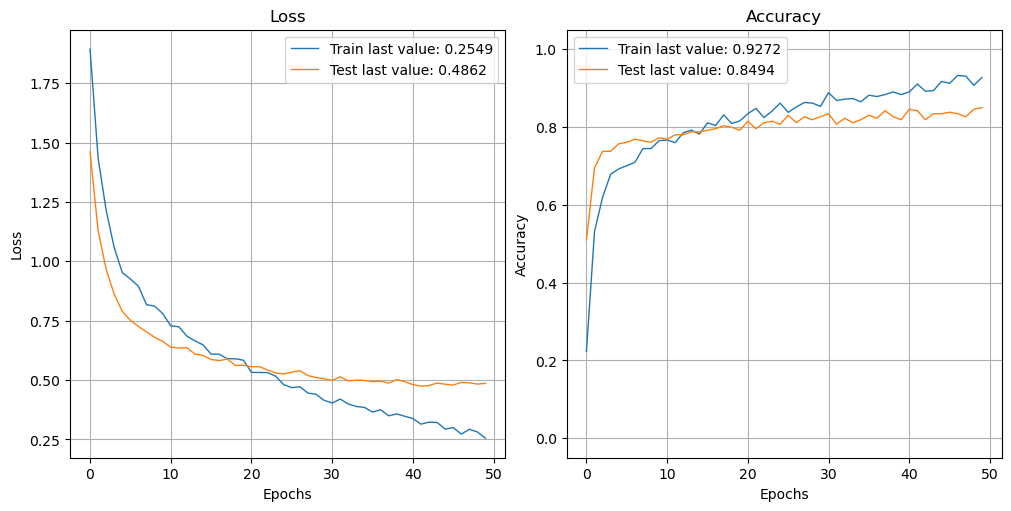

In [47]:
from plot_keras_history import show_history, plot_history
import matplotlib.pyplot as plt

show_history(history4)
plot_history(history4, path="standard.png")
plt.close()

### <a name="C425"> 4.2.5) Evaluation du modèle <a/>

### a.) Conversion des Labels en Labels numérique

##### Data Train

In [48]:
def image_prep_fct(data) :
    prepared_images = []

    # Boucle pour extraire les caractéristiques de chaque image
    for image_file in data_train["nouveau_nom"]:
        img_path = "./Flipkart/images_renommees_split/dataset_train/"
        image = load_img(img_path + image_file, target_size=(224, 224)) # Charge l'image et redimensionne l'image 
        img = img_to_array(image) # Convertir l'image en un tableau numpy.
       
        img = img.reshape((img.shape[0], img.shape[1], img.shape[2])) # Réorganise les dimensions du tableau pour correspondre à la forme (hauteur, largeur, canaux) de l'image.
        img = preprocess_input(img)
        prepared_images.append(img)
        prepared_images_np = np.array(prepared_images) #  Convertir la liste en un tableau numpy.
    return prepared_images_np
    
images_np = image_prep_fct(data_train)
X_train = images_np

C:\Users\dmedc\anaconda3\lib\site-packages\PIL\Image.py:2896: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


In [49]:
from tensorflow.keras.utils import to_categorical
# effectue la conversion des étiquettes de classe en format catégoriel
y_train = to_categorical(data_train['label'])

# Convertir avec one-hot encoded labels en labels numérique
y_train_num = np.argmax(y_train, axis=1)

In [50]:
# Prédire les étiquettes
y_train_pred = np.argmax(model4.predict(X_train), axis=1)
y_train_num = np.argmax(y_train, axis=1)

print(y_train_num)
print("----------------------------------------------------------------------------------")
print(y_train_pred)

25/25 [==============================] - 144s 6s/step
[6 5 6 4 4 0 4 6 4 2 1 0 0 5 4 1 3 0 1 5 1 1 4 0 2 4 4 5 5 1 4 2 2 2 5 2 3
 1 0 6 3 0 1 5 5 2 1 6 1 2 1 6 5 5 2 3 5 6 3 0 0 5 6 1 0 2 4 1 2 0 4 1 2 3
 3 5 4 4 4 3 2 6 5 3 2 3 1 4 6 4 0 2 0 6 1 3 3 6 5 4 3 3 5 3 6 4 0 2 0 0 0
 6 0 4 4 5 6 3 2 3 6 6 4 6 1 3 5 6 0 0 4 1 2 6 0 1 0 1 5 3 0 1 5 6 0 4 0 1
 4 4 5 6 3 6 3 3 6 3 4 1 4 2 5 0 3 1 1 4 5 0 6 2 1 3 2 3 4 1 6 3 2 2 4 3 1
 0 3 5 3 6 4 6 6 1 1 0 5 1 1 1 5 6 0 1 3 2 4 2 1 2 5 1 0 6 6 6 3 5 4 1 0 1
 6 6 2 6 2 3 6 2 6 5 5 3 5 6 4 3 2 1 3 3 5 0 4 4 4 4 5 1 2 5 3 0 3 2 3 1 4
 6 5 5 1 0 6 3 0 4 2 2 5 2 3 2 4 6 0 4 0 2 0 0 3 5 1 2 3 6 6 2 0 2 6 4 1 6
 3 1 5 6 4 3 4 0 5 5 4 3 5 6 1 1 5 2 3 6 1 0 5 3 2 3 0 4 0 5 6 6 6 0 1 0 0
 6 6 4 5 0 1 1 5 6 0 5 6 5 5 5 5 4 4 4 5 3 0 6 6 0 1 2 2 1 0 5 6 5 4 5 6 3
 5 5 1 4 0 2 0 1 0 3 1 4 5 2 3 1 4 5 0 3 3 5 4 3 0 2 2 2 4 5 5 2 2 3 4 5 2
 6 3 2 2 4 4 2 5 0 1 2 6 2 0 6 5 0 0 2 4 2 1 1 6 6 3 1 6 6 0 3 6 5 6 5 0 5
 6 3 2 6 4 1 2 4 4 3 6 4 6 0 2 5 4 6 3 5 3 4 0

#### Data Test

In [51]:
def image_prep_fct(data) :
    prepared_images = []

    # Boucle pour extraire les caractéristiques de chaque image
    for image_file in data_test["nouveau_nom"]:
        img_path = "./Flipkart/images_renommees_split/dataset_test/"
        image = load_img(img_path + image_file, target_size=(224, 224)) # Charge l'image et redimensionne l'image 
        img = img_to_array(image) # Convertir l'image en un tableau numpy.
       
        img = img.reshape((img.shape[0], img.shape[1], img.shape[2])) # Réorganise les dimensions du tableau pour correspondre à la forme (hauteur, largeur, canaux) de l'image.
        img = preprocess_input(img)
        prepared_images.append(img)
        prepared_images_np = np.array(prepared_images) #  Convertir la liste en un tableau numpy.
    return prepared_images_np
    
images_np = image_prep_fct(data_test)
X_test = images_np

In [52]:
# effectue la conversion des étiquettes de classe en format catégoriel
y_test = to_categorical(data_test['label'])

# Convertir avec one-hot encoded labels en labels numérique
y_test_num = np.argmax(y_test, axis=1)

In [53]:
# Prédire les étiquettes
y_test_pred = np.argmax(model4.predict(X_test), axis=1)
y_test_num = np.argmax(y_test, axis=1)

print(y_test_num)
print("----------------------------------------------------------------------------------")
print(y_test_pred)

9/9 [==============================] - 51s 6s/step
[5 3 5 1 6 0 5 6 0 0 4 4 1 1 6 2 3 2 4 3 6 5 0 2 3 0 2 3 2 6 0 5 1 1 3 3 5
 0 2 3 4 6 2 5 5 0 1 5 3 3 2 6 5 0 0 5 4 6 6 2 4 3 3 2 3 0 2 6 1 1 0 1 1 3
 1 0 1 0 6 4 1 4 3 1 1 2 4 2 4 3 5 2 0 0 5 5 6 4 5 1 2 3 0 4 0 5 6 1 0 5 4
 4 2 4 0 1 4 3 5 1 6 3 4 6 2 6 0 1 5 6 4 2 2 0 0 1 4 0 6 5 5 5 6 6 0 3 2 0
 0 1 0 0 2 6 3 6 1 1 0 3 1 0 2 3 6 5 4 2 4 3 0 5 1 6 2 1 5 2 0 1 5 1 1 5 4
 2 3 3 5 0 6 3 4 2 1 2 2 6 1 2 5 4 6 1 1 2 3 2 5 3 5 0 3 5 5 3 0 6 6 5 1 4
 1 5 4 3 3 1 4 1 4 2 4 6 0 5 2 6 4 5 2 6 2 6 0 1 0 3 4 5 2 2 1 1 1 4 0 4 3
 4 4 1 3]
----------------------------------------------------------------------------------
[2 3 5 1 6 0 5 6 3 0 4 4 1 1 6 2 2 2 0 1 6 5 0 2 3 0 2 3 2 6 0 5 1 1 2 3 5
 0 2 4 0 6 2 5 5 0 1 5 5 3 2 6 0 0 4 5 4 6 6 2 0 3 4 2 3 0 2 6 1 2 0 1 1 3
 1 5 1 3 6 0 1 0 3 1 1 2 4 2 4 3 5 2 0 0 5 5 6 0 5 1 2 0 0 4 0 5 6 1 0 5 0
 4 2 4 0 1 4 2 5 5 6 3 4 6 5 6 4 1 5 6 4 2 2 0 0 1 4 0 6 5 5 5 6 5 3 3 2 3
 0 1 0 0 2 6 3 6 1 1 0 3 1 0 5 

### b.) Analyse de similarité (ARI)

In [54]:
from sklearn import cluster, metrics

print("Le Score ARI pour data_train est de : ", metrics.adjusted_rand_score(y_train_num, y_train_pred))
print(60*"-")
print("Le Score ARI pour data_test est de : ", metrics.adjusted_rand_score(y_test_num, y_test_pred))

Le Score ARI pour data_train est de :  0.7438646879894292
------------------------------------------------------------
Le Score ARI pour data_train est de :  0.6109088670434935


### c.) Analyse de précision (Accuracy)

####  Matrice de confusion

La matrice de confusion permet d'analyser les erreurs de classification commises par le modèle. En examinant les valeurs hors de la diagonale (les valeurs d'erreur), vous pouvez identifier quelles classes sont souvent confondues entre elles. Cela peut vous donner des indications sur les améliorations potentielles à apporter au modèle ou aux données pour améliorer les performances de classification.

In [55]:
# Matrice de confusion
from sklearn import cluster, metrics

conf_mat_train = metrics.confusion_matrix(y_train_num, y_train_pred)
print("Donnée d'entrainement")
print(conf_mat_train)

print("---------------------------------------------------------------------------------------")

conf_mat_test = metrics.confusion_matrix(y_test_num, y_test_pred)
print("Donnée test")
print(conf_mat_test)

Donnée d'entrainement
[[ 90   4   2   5   8   1   0]
 [  2  92   5   6   1   1   0]
 [  0   3 104   2   0   2   1]
 [  1   1   3 105   2   2   0]
 [ 22   1   1   4  87   0   0]
 [  1   2   3   3   0 103   0]
 [  0   4   1   2   0   0 110]]
---------------------------------------------------------------------------------------
Donnée test
[[29  0  0  6  4  1  0]
 [ 0 37  2  1  2  1  0]
 [ 0  4 31  1  0  2  0]
 [ 1  3  3 26  2  1  0]
 [10  0  0  0 25  0  0]
 [ 2  1  2  0  0 33  0]
 [ 0  0  1  0  0  1 31]]


La fonction **conf_mat_transform()** utilise une matrice de confusion pour attribuer une correspondance entre les valeurs prédites et les classes réelles, puis elle transforme les valeurs prédites en utilisant cette correspondance

In [56]:
def conf_mat_transform(y_true,y_pred) :
    conf_mat = metrics.confusion_matrix(y_true,y_pred)
    
    # Trouver l'indice maximum dans chaque colonne de la matrice de confusion
    corresp = np.argmax(conf_mat, axis=0)
    print ("Correspondance des clusters : ", corresp)
    #  créer un objet Series à partir des valeurs réelles y_true et le trasforme en dataframe
    labels = pd.Series(y_true, name="y_true").to_frame()
    # ajouter une colonne "y_pred" au DataFrame labels et y assigner les valeurs prédites y_pred
    labels['y_pred'] = y_pred
    # remplacer la valeur prédite par sa correspondance trouvée dans le tableau corresp
    labels['y_pred_transform'] = labels['y_pred'].apply(lambda x : corresp[x]) 
    
    return labels['y_pred_transform']

#### c1.) Evaluation Data Train

In [57]:
y_train_pred_transform = conf_mat_transform(y_train_num, y_train_pred)
conf_mat = metrics.confusion_matrix(y_train_num, y_train_pred_transform)
print(conf_mat)
print("-----------------------------------------------------------------------")
print(metrics.classification_report(y_train_num, y_train_pred_transform))

Correspondance des clusters :  [0 1 2 3 4 5 6]
[[ 90   4   2   5   8   1   0]
 [  2  92   5   6   1   1   0]
 [  0   3 104   2   0   2   1]
 [  1   1   3 105   2   2   0]
 [ 22   1   1   4  87   0   0]
 [  1   2   3   3   0 103   0]
 [  0   4   1   2   0   0 110]]
-----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       110
           1       0.86      0.86      0.86       107
           2       0.87      0.93      0.90       112
           3       0.83      0.92      0.87       114
           4       0.89      0.76      0.82       115
           5       0.94      0.92      0.93       112
           6       0.99      0.94      0.96       117

    accuracy                           0.88       787
   macro avg       0.88      0.88      0.88       787
weighted avg       0.88      0.88      0.88       787



<AxesSubplot:>

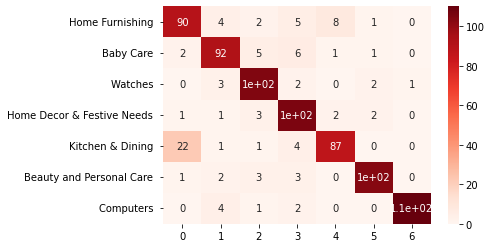

In [58]:
df_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels],
                  columns = [i for i in "0123456"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Reds")

#### c2.) Evaluation Data Test

In [59]:
y_test_pred_transform = conf_mat_transform(y_test_num, y_test_pred)
conf_mat = metrics.confusion_matrix(y_test_num, y_test_pred_transform)
print(conf_mat)
print("-----------------------------------------------------------------------")
print(metrics.classification_report(y_test_num, y_test_pred_transform))

Correspondance des clusters :  [0 1 2 3 4 5 6]
[[29  0  0  6  4  1  0]
 [ 0 37  2  1  2  1  0]
 [ 0  4 31  1  0  2  0]
 [ 1  3  3 26  2  1  0]
 [10  0  0  0 25  0  0]
 [ 2  1  2  0  0 33  0]
 [ 0  0  1  0  0  1 31]]
-----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.69      0.72      0.71        40
           1       0.82      0.86      0.84        43
           2       0.79      0.82      0.81        38
           3       0.76      0.72      0.74        36
           4       0.76      0.71      0.74        35
           5       0.85      0.87      0.86        38
           6       1.00      0.94      0.97        33

    accuracy                           0.81       263
   macro avg       0.81      0.81      0.81       263
weighted avg       0.81      0.81      0.81       263



<AxesSubplot:>

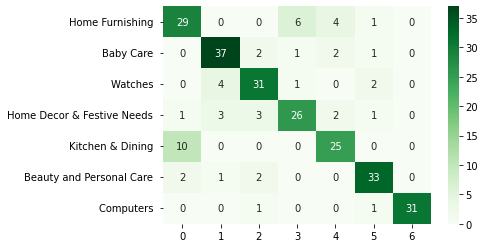

In [60]:
df_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels],
                  columns = [i for i in "0123456"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Greens")

######  <a href="#C"> Retour Sommaire <a/>